In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from chromalab.observer import Observer, Cone, transformToChromaticity, getHeringMatrix
from chromalab.inks import Neugebauer, InkGamut, CellNeugebauer, Pigment, InkLibrary
from chromalab.spectra import Spectra, Illuminant
from chromalab.maxbasis import MaxBasis
from chromalab.cubemap import CubeMap

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl


RuntimeError: 'ipympl is not a recognised GUI loop or backend name

In [4]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

In [5]:
all_inks = {}
with open(f'../data/nix/Inks_all.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        all_inks[name] = spectra
        
        
with open(f'../data/nix/02022024.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        all_inks[name] = spectra
        
with open(f'../data/nix/011624.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        try:
            spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        except ValueError:
            continue
        all_inks[name] = spectra

/Users/frackfrick/Desktop/SchoolStuff/compColor/ChromaLab/chromalab/spectra.py:36: UserWarning: Data has values not between 0 and 1. Clipping.
  warnings.warn("Data has values not between 0 and 1. Clipping.")


In [6]:
cmy_primaries_dict = {}
with open(f'../data/nix/PrintColors/000.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i == 4:
            color_data = np.array(row[33:],dtype=float)
            spectra = Spectra(data=color_data, wavelengths=wavelengths10)
            cmy_primaries_dict["000"] = spectra

In [7]:
collection1 = [all_inks["Platinum violet"], 
              all_inks["Di citrus yellow"], 
              all_inks["Mg turquoise"], 
              all_inks["V maskara "],
              all_inks["Kaweco green"]]

collection2 = [all_inks["Platinum violet"], 
              all_inks["Di citrus yellow"], 
              all_inks["Mg turquoise"], 
              all_inks["V maskara "],
              all_inks["Kaweco green"], 
              all_inks["Peach haze D"]]

collection3 = [all_inks["Platinum violet"], 
              all_inks["Di citrus yellow"], 
              all_inks["Mg turquoise"], 
              all_inks["V maskara "],
              all_inks["Peach haze D"]]

collection4 = [all_inks["Platinum violet"], 
              all_inks["Di citrus yellow"], 
              all_inks["Mg turquoise"], 
              all_inks["V maskara "],
              all_inks["Lamy red"]]

collection = collection4

In [8]:
paper = cmy_primaries_dict["000"]
d65 = Illuminant.get("d65")

In [9]:
wavelengths = np.arange(390, 700, 10)
d65 = Illuminant.get("D65")

tetrachromat = Observer.tetrachromat(wavelengths=wavelengths, illuminant=d65, verbose=True) 
maxbasis = MaxBasis(tetrachromat, verbose=True)
tetra_maxbasis = maxbasis.get_max_basis_observer()

100%|██████████| 28/28 [00:00<00:00, 68.27it/s]


In [10]:
gamut = InkGamut(collection, paper, illuminant=d65)
spectral_pc, perc = gamut.get_spectral_point_cloud(tetrachromat, stepsize=0.05)

Generating point cloud: 41it [00:08,  4.98it/s]                        


In [11]:
point_cloud, perc = gamut.get_point_cloud(tetrachromat, stepsize=0.05)

Generating point cloud: 41it [00:10,  3.82it/s]                        


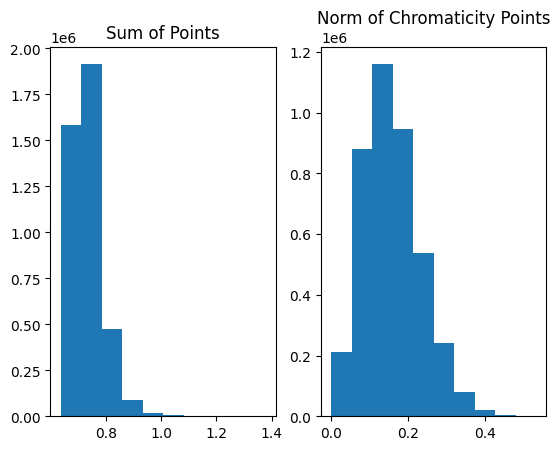

In [12]:
HMatrix = getHeringMatrix(4)
Tmat = maxbasis.get_cone_to_maxbasis_transform()
maxbasis_pts = (Tmat @ point_cloud.T).T
chrom_pts = transformToChromaticity(maxbasis_pts)
hering_max = (HMatrix@maxbasis_pts.T).T

fig, axs = plt.subplots(1, 2)

axs[0].hist(hering_max[:, 0])
axs[0].set_title('Sum of Points')
axs[1].hist(np.linalg.norm(chrom_pts, axis=1))
axs[1].set_title('Norm of Chromaticity Points')
plt.show()

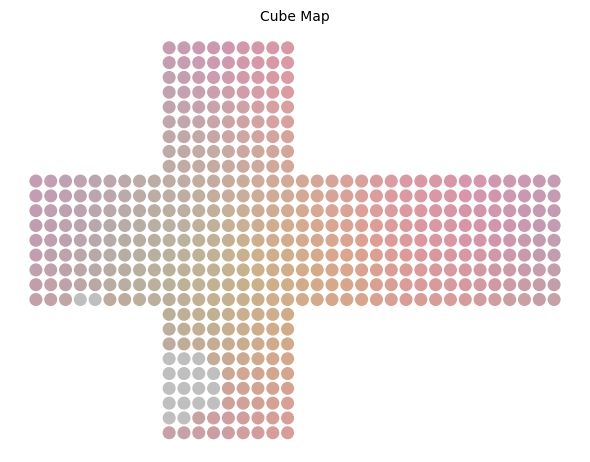

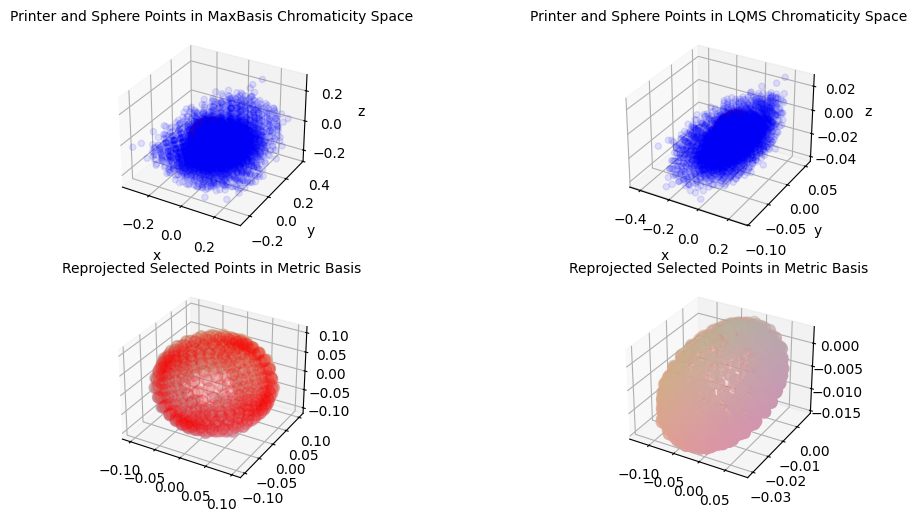

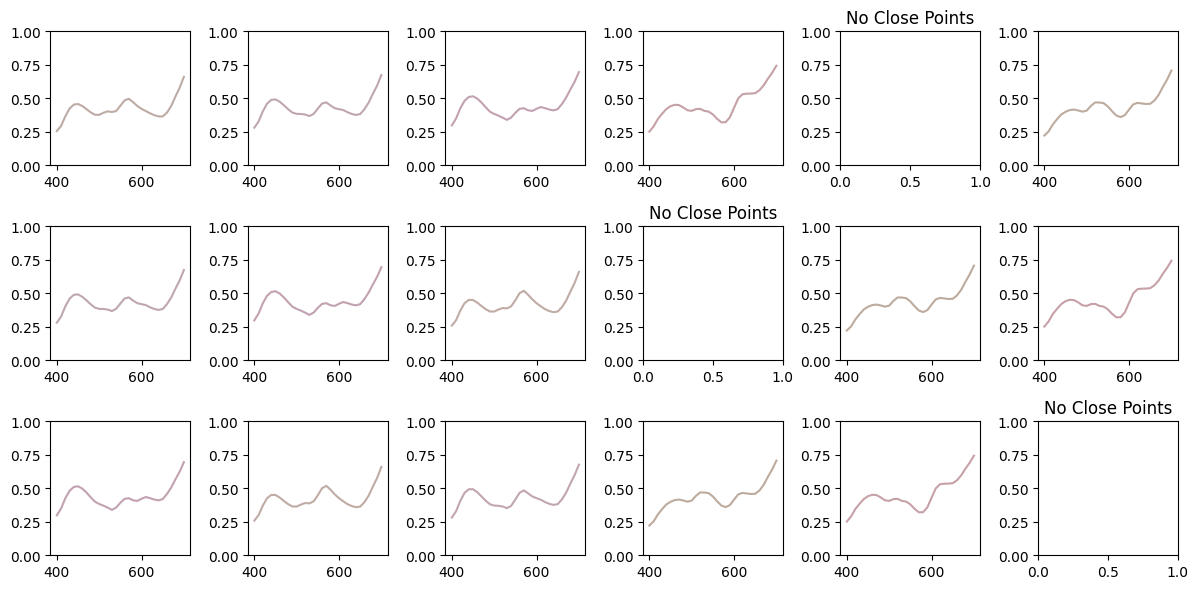

(array([[ 0.69816683, -0.09802439,  0.00248612, -0.00584587],
        [ 0.70072123, -0.10209026, -0.00356534, -0.01571959],
        [ 0.69898579, -0.09219011, -0.00821132, -0.02936878],
        ..., 
        [ 0.69912618,  0.0562944 ,  0.03666544,  0.07222773],
        [ 0.69902103,  0.0493461 ,  0.03842299,  0.07893119],
        [ 0.69900642,  0.03608928,  0.04185532,  0.07982456]]),
 array([ 256671,  471146,  870316, 1055094, 1444519, 1424167, 2222043,
        2211857, 2405896,   91888,  276666,  247432,  646665, 1035648,
        1629320, 2017840, 2611028, 3204216,   71957,   82186,   52952,
         452185,  842558, 1025947, 1414467, 2007676, 3000013,  110895,
          81745,   82672,  268377,  647173, 1231564, 1619621, 2007699,
        2201717,  110454,   81283,   82231,   73434,  453157,  831490,
        1619644, 2212369, 2006774,  100268,  100753,   91493,   72509,
         461977,  840752,  820314, 2017448, 2610173,  109551,  110015,
         100755,   81792,  470776, 1054262, 

In [13]:
cubemap = CubeMap(point_cloud, maxbasis, refs=spectral_pc, ref_wavelengths= np.arange(400, 701, 10), verbose=True)
# lumval = 0.5; satval = 0.2; side_len = 9 # works for lmsq metric
lumval = 0.7; satval = 0.1; side_len = 9
cubemap.display_detailed_cubemap(lumval, satval, side_len, method='hering') # method is if we choose distance to be in the cone basis or the max basis. The basis selects points but it won't be a sphere.

# With Neugebauer Measurements

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Generating point cloud: 41it [00:08,  4.96it/s]                        
Generating point cloud: 41it [00:10,  3.79it/s]                        


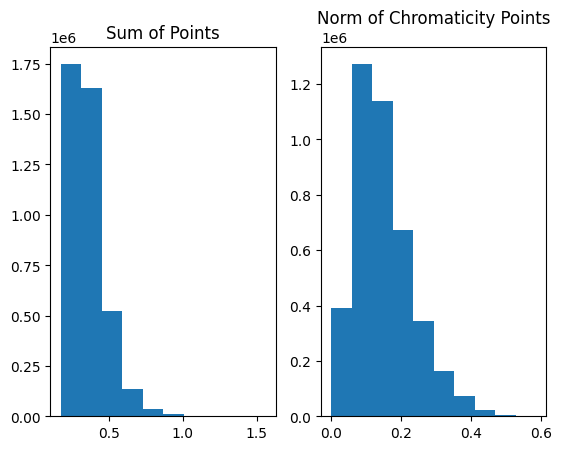

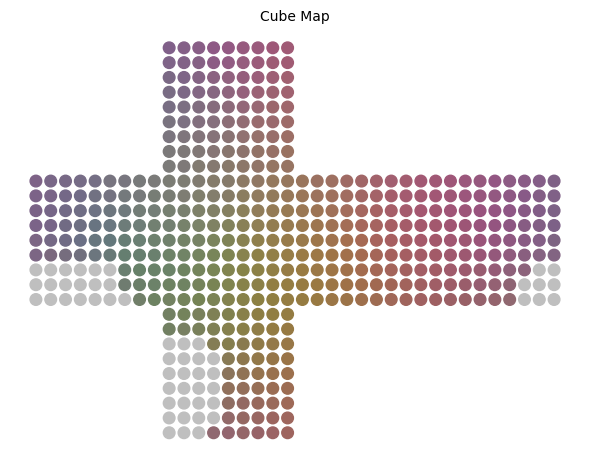

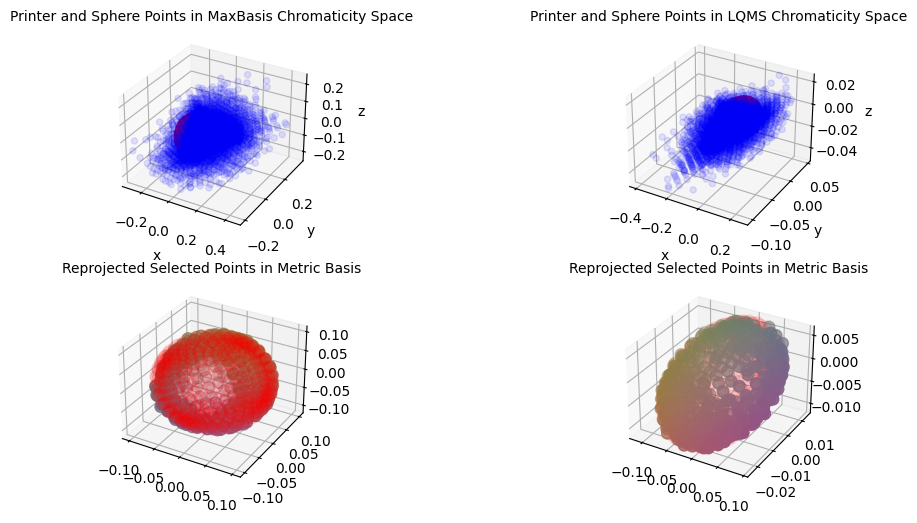

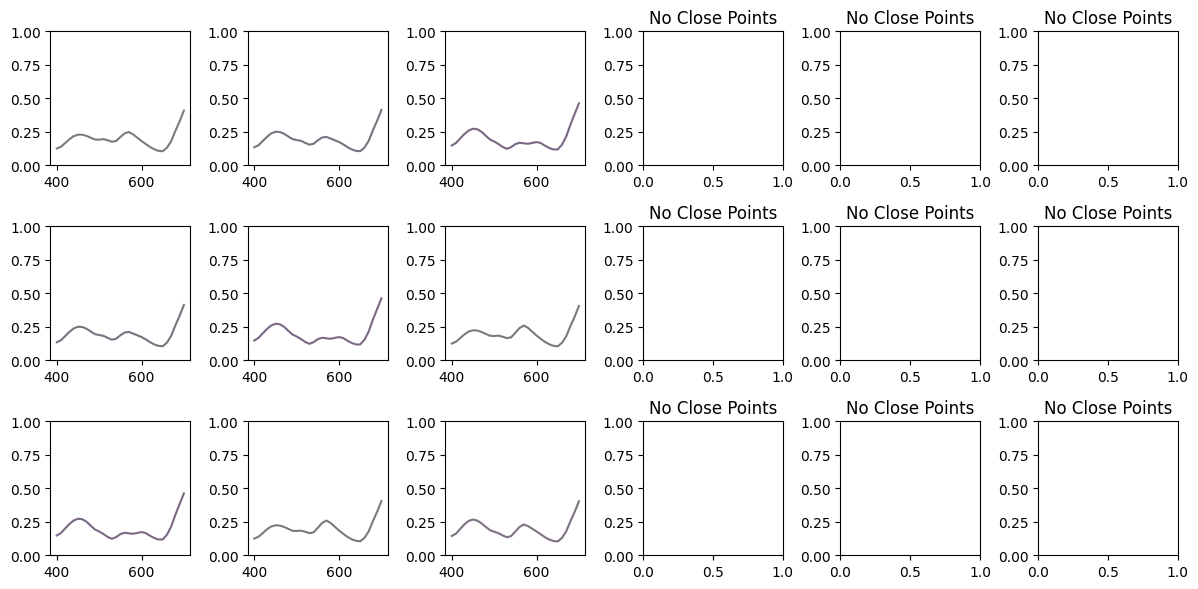

In [20]:
%load_ext autoreload
%autoreload 2
primaries = {}
data = []
with open(f'../data/nix/25lamy.csv') as csvf: # change the file depending on which ink set to use
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        primaries[name] = spectra
        data += [tetrachromat.observe(spectra)]


neug = Neugebauer(primaries)
gamut = InkGamut(neug, paper, d65)

spectral_pc, perc = gamut.get_spectral_point_cloud(tetrachromat, stepsize=0.05)
point_cloud, perc = gamut.get_point_cloud(tetrachromat, stepsize=0.05)

HMatrix = getHeringMatrix(4)
Tmat = maxbasis.get_cone_to_maxbasis_transform()
maxbasis_pts = (Tmat @ point_cloud.T).T
chrom_pts = transformToChromaticity(maxbasis_pts)
hering_max = (HMatrix@maxbasis_pts.T).T

fig, axs = plt.subplots(1, 2)

axs[0].hist(hering_max[:, 0])
axs[0].set_title('Sum of Points')
axs[1].hist(np.linalg.norm(chrom_pts, axis=1))
axs[1].set_title('Norm of Chromaticity Points')
plt.show()

cubemap = CubeMap(point_cloud, maxbasis, refs=spectral_pc, ref_wavelengths= np.arange(400, 701, 10), verbose=True)
lumval = 0.3; satval = 0.1; side_len = 4
selected_max, idxs = cubemap.display_detailed_cubemap(lumval, satval, side_len, method='lmsq')

percentages_final = cubemap.get_cubemap_percentages(perc, lumval, satval, side_len, method='lmsq')
np.save(f'../data/nix/4x4_full_percentages.npy', percentages_final) # change the file name saved
indecies = cubemap.get_cubemap_indicies(side_len)
np.save(f'../data/nix/4x4_idx_into_cubemap.npy', indecies)